<a href="https://colab.research.google.com/github/BhargaviM0729/Chest-X-ray-Classification-using-CNN-and-VGG16-Detecting-COVID-19-Pneumonia-and-Tuberculosis/blob/main/Chest_X_ray_Classification_using_CNN_and_VGG16_Detecting_COVID_19%2C_Pneumonia%2C_and_Tuberculosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ./kaggle
!cp kaggle_chest_Xray.json ~/.kaggle/

cp: cannot stat 'kaggle_chest_Xray.json': No such file or directory


In [ ]:
!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

Dataset URL: https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis
License(s): other
 99% 1.73G/1.74G [00:18<00:00, 55.6MB/s]
100% 1.74G/1.74G [00:18<00:00, 100MB/s] 


In [ ]:
!unzip /content/chest-xray-pneumoniacovid19tuberculosis.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/NORMAL/NORMAL2-IM-0843-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0845-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0846-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0847-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0848-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0849-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0851-0001-0002.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0851-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0852-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0853-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0854-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0855-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0856-0001.jpeg  
  inflating: /content/train/NORMAL/NORMAL2-IM-0857-0001.j

In [ ]:
 import tensorflow as tf
 from tensorflow.keras import layers, models
 from tensorflow.keras.layers import Rescaling

 # For reproducibility
 import numpy as np
 import random
 import os

 seed = 123
 random.seed(seed)
 np.random.seed(seed)
 tf.random.set_seed(seed)


In [ ]:
# Directories containing the dataset
train_dir = '/content/train' # update this path to training data directory
val_dir = '/content/val'  # Update this path to validation data directory
test_dir = '/content/test' # Update this path to testing data directory

# Hyperparameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20
num_classes = 4 # Update based on your dataset


In [ ]:
# Load the datasets without validation split

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
      train_dir,
      image_size = (img_width, img_height),
      batch_size = batch_size
)

Found 6326 files belonging to 4 classes.


In [ ]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
      val_dir,
      image_size = (img_width, img_height),
      batch_size  = batch_size
)

Found 38 files belonging to 4 classes.


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
      test_dir,
      image_size = (img_width, img_height),
      batch_size = batch_size
)

Found 771 files belonging to 4 classes.


In [ ]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
      layers.RandomFlip("horizontal_and_vertical"),
      layers.RandomRotation(0.2),
])

In [ ]:
 # Apply data augmentation only to the training data
train_dataset = train_dataset.map(lambda x, y :(data_augmentation(x, training = True),y))

In [ ]:
# Prefetch the datasets for better performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size = AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size= AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size = AUTOTUNE)

In [ ]:
def build_vgg16(input_shape = (224,224,3),num_classes = 4):
  model = models.Sequential()

  # Add Input Layer
  model.add(layers.Input(shape=input_shape))

  # Normalization Layer
  model.add(Rescaling(1./255))

  # Block 1
  model.add(layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
  model.add(layers.Conv2D(64,(3,3),padding = 'same', activation = 'relu'))
  model.add(layers.MaxPooling2D((2,2),strides = (2,2)))

  # Block 2
  model.add(layers.Conv2D(128,(3,3),padding = 'same', activation = 'relu'))
  model.add(layers.Conv2D(128,(3,3),padding = 'same',activation ='relu'))
  model.add(layers.MaxPooling2D((2,2),strides = (2,2)))

  # Block 3
  model.add(layers.Conv2D(256,(3,3),padding = 'same',activation = 'relu'))
  model.add(layers.Conv2D(256,(3,3),padding = 'same',activation = 'relu'))
  model.add(layers.Conv2D(256,(3,3),padding = 'same',activation = 'relu'))
  model.add(layers.MaxPooling2D((2,2),strides = (2,2)))

  # Block 4
  model.add(layers.Conv2D(512,(3,3),padding = 'same',activation = 'relu'))
  model.add(layers.Conv2D(512,(3,3),padding = 'same',activation = 'relu'))
  model.add(layers.Conv2D(512,(3,3),padding = 'same',activation = 'relu'))
  model.add(layers.MaxPooling2D((2,2),strides = (2,2)))

  # Block 5
  model.add(layers.Conv2D(512,(3,3),padding = 'same', activation = 'relu'))
  model.add(layers.Conv2D(512,(3,3),padding = 'same', activation = 'relu'))
  model.add(layers.Conv2D(512,(3,3),padding = 'same', activation = 'relu'))
  model.add(layers.MaxPooling2D((2,2), strides = (2,2)))

  # Fully connected layers
  model.add(layers.Flatten())
  model.add(layers.Dense(4096,activation = 'relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096,activation = 'relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(num_classes, activation = 'softmax')) # Adjust based on number of calsses

  return model



In [ ]:
model = build_vgg16(num_classes = num_classes)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 134,276,932 (512.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              metrics =['accuracy'])

In [ ]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = epochs
)

Epoch 1/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 238s 982ms/step - accuracy: 0.5594 - loss: 1.3846 - val_accuracy: 0.2105 - val_loss: 1.8423
Epoch 2/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 167s 697ms/step - accuracy: 0.6088 - loss: 1.0639 - val_accuracy: 0.2105 - val_loss: 1.8303
Epoch 3/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 143s 701ms/step - accuracy: 0.6110 - loss: 1.0619 - val_accuracy: 0.2105 - val_loss: 1.8236
Epoch 4/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 142s 701ms/step - accuracy: 0.6151 - loss: 1.0553 - val_accuracy: 0.2105 - val_loss: 1.8005
Epoch 5/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 140s 701ms/step - accuracy: 0.6136 - loss: 1.0566 - val_accuracy: 0.2105 - val_loss: 1.8571
Epoch 6/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 162s 804ms/step - accuracy: 0.6133 - loss: 1.0557 - val_accuracy: 0.2105 - val_loss: 1.7942
Epoch 7/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 163s 818ms/step - accuracy: 0.6099 - loss: 1.0623 - val_accuracy: 0.2105 - val_loss: 1.8184
Epoch 8/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 160s 805ms/step - accuracy: 0.6107 -

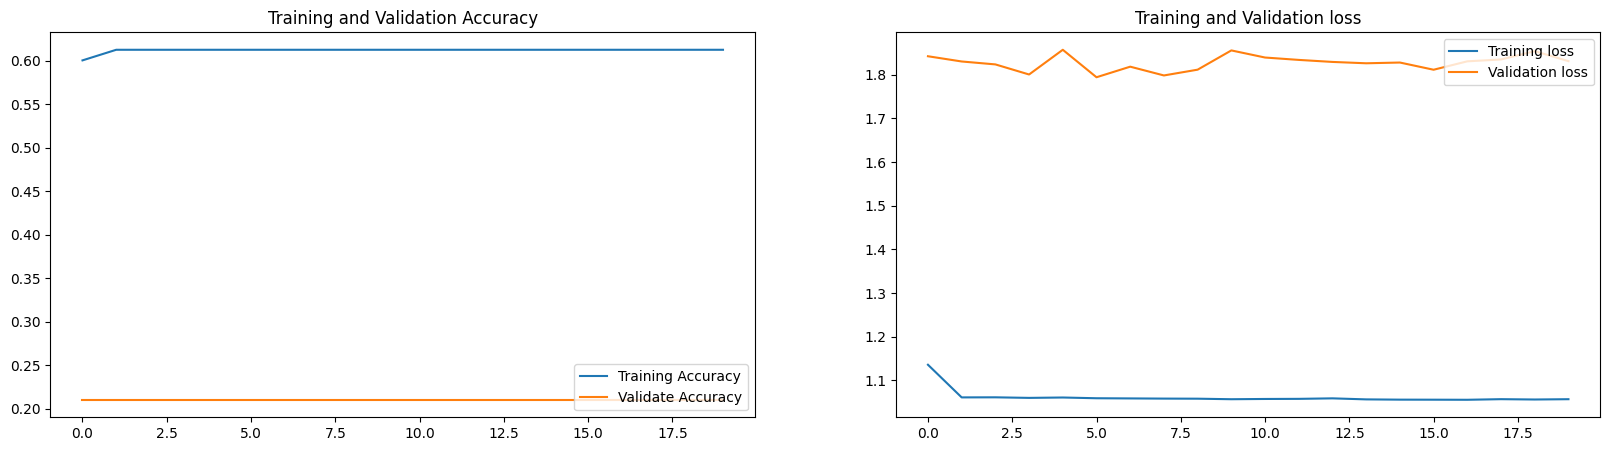

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(epochs_range , acc,label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validate Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training loss')
plt.plot(epochs_range, val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 435ms/step - accuracy: 0.4901 - loss: 1.2275
Test Accuracy: 50.58%


In [ ]:
# Test set predictions
y_train_true = np.concatenate([y for x,y in train_dataset], axis = 0)
y_train_pred = model.predict(train_dataset)
y_train_pred = np.argmax(y_train_pred, axis = 1)

# Validation set predictions
y_val_true = np.concatenate([y for x,y in validation_dataset], axis = 0)
y_val_pred = model.predict(validation_dataset)
y_val_pred = np.argmax(y_val_pred, axis = 1)

# Test set predictions
y_test_true = np.concatenate([y for x,y in test_dataset], axis = 0)
y_test_pred = model.predict(test_dataset)
y_test_pred = np.argmax(y_test_pred, axis = 1)


198/198 ━━━━━━━━━━━━━━━━━━━━ 100s 497ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 456ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix (y_train_true, y_train_pred)
cm_val = confusion_matrix(y_val_true, y_val_pred)
cm_test = confusion_matrix(y_test_true, y_test_pred)


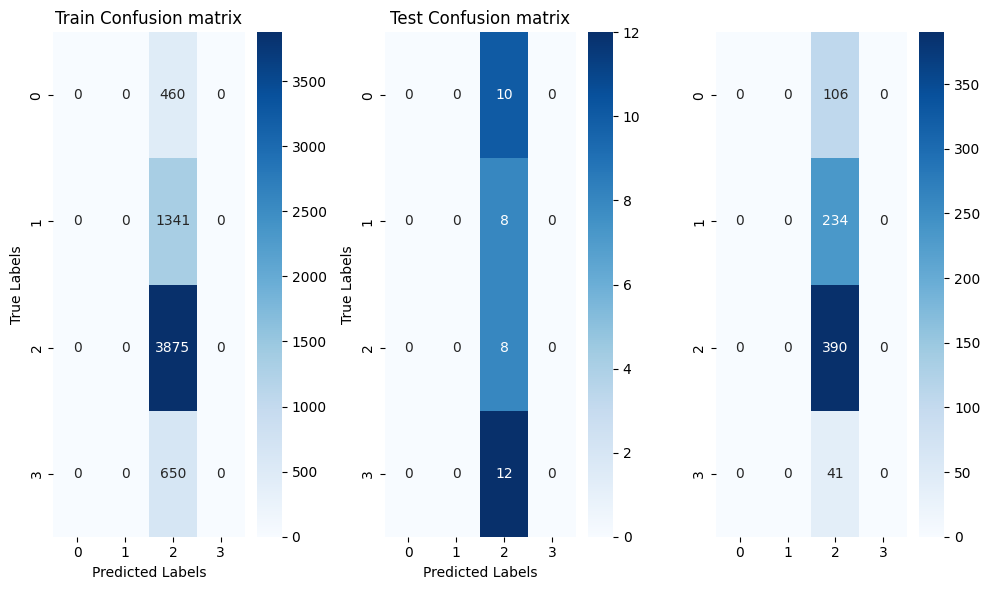

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# setup the figure
fig, axes = plt.subplots(1,3, figsize = (10,6))

# Train Confusion matrix
sns.heatmap(cm_train, annot = True, fmt='d', cmap = 'Blues', ax = axes[0])
axes[0].set_title('Train Confusion matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Validation Confusion Matrix
sns.heatmap(cm_val, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[1])
axes[1].set_title('Validation Confusion matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Test Confusion Matrix
sns.heatmap(cm_test, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[2])
axes[1].set_title('Test Confusion matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Adjust Layout
plt.tight_layout()
plt.show()

Concept of Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Input

In [ ]:
# Load VGG16 with pre-trained ImageNet weights, excluding the top (fully-connected ) layers
base_model = VGG16(weights = 'imagenet',
                   include_top = False,
                   input_tensor = Input(shape=(224,224,3)))
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Build the model
model = models.Sequential([
       base_model,
       layers.Flatten(),
       layers.Dense(512, activation = 'relu'),
       layers.Dropout(0.5),
       layers.Dense(4,activation = 'softmax') # Adjust the number of classes
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'sparse_categorical_crossentropy', # or 'categorical_crossentropy' if labels are one-hot encoded
              metrics = ['accuracy'])

# Transfer learning with fixed weight in convolutions and training model

In [ ]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10
)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 100s 487ms/step - accuracy: 0.7544 - loss: 4.1116 - val_accuracy: 0.7895 - val_loss: 1.7829
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 95s 477ms/step - accuracy: 0.8915 - loss: 0.6847 - val_accuracy: 0.8158 - val_loss: 0.9505
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 93s 471ms/step - accuracy: 0.9002 - loss: 0.4100 - val_accuracy: 0.8947 - val_loss: 0.4738
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 143s 476ms/step - accuracy: 0.9127 - loss: 0.2969 - val_accuracy: 0.8421 - val_loss: 0.6160
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 142s 475ms/step - accuracy: 0.9185 - loss: 0.2882 - val_accuracy: 0.8684 - val_loss: 0.3493
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 141s 469ms/step - accuracy: 0.9238 - loss: 0.2279 - val_accuracy: 0.8421 - val_loss: 0.3531
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 95s 477ms/step - accuracy: 0.9268 - loss: 0.2346 - val_accuracy: 0.9474 - val_loss: 0.2327
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 141s 474ms/step - accuracy: 0.9340 - lo

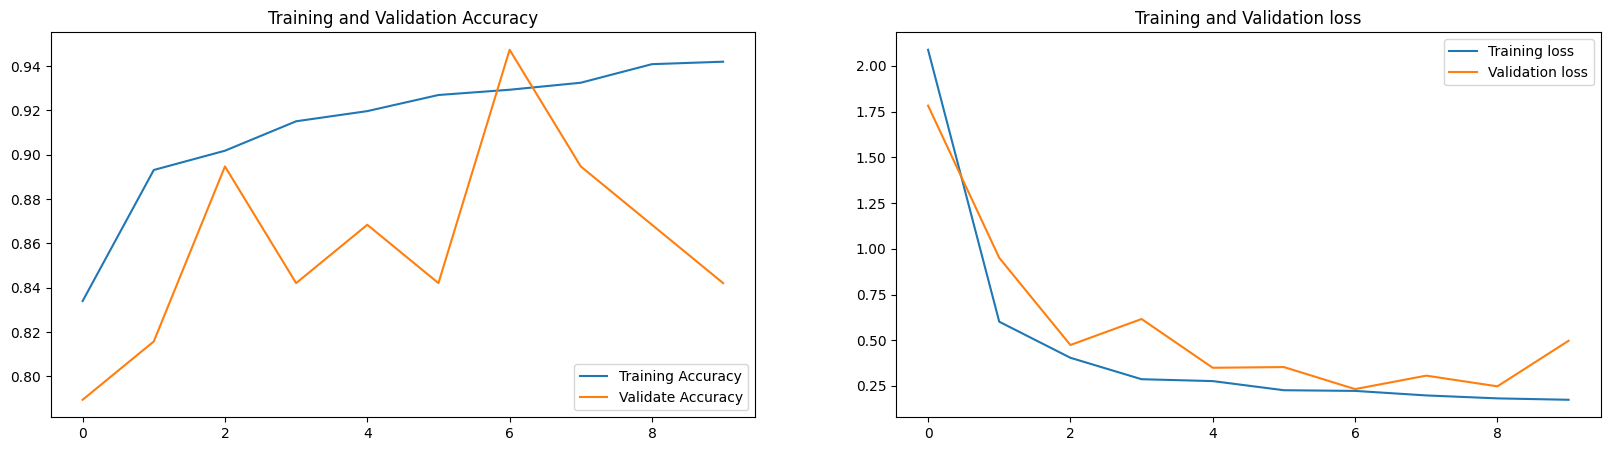

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(epochs_range , acc,label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validate Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training loss')
plt.plot(epochs_range, val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.8263 - loss: 0.8148
Test Accuracy: 83.27%


In [ ]:
# Test set predictions
y_train_true = np.concatenate([y for x,y in train_dataset], axis = 0)
y_train_pred = model.predict(train_dataset)
y_train_pred = np.argmax(y_train_pred, axis = 1)

# Validation set predictions
y_val_true = np.concatenate([y for x,y in validation_dataset], axis = 0)
y_val_pred = model.predict(validation_dataset)
y_val_pred = np.argmax(y_val_pred, axis = 1)

# Test set predictions
y_test_true = np.concatenate([y for x,y in test_dataset], axis = 0)
y_test_pred = model.predict(test_dataset)
y_test_pred = np.argmax(y_test_pred, axis = 1)

198/198 ━━━━━━━━━━━━━━━━━━━━ 88s 437ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix (y_train_true, y_train_pred)
cm_val = confusion_matrix(y_val_true, y_val_pred)
cm_test = confusion_matrix(y_test_true, y_test_pred)

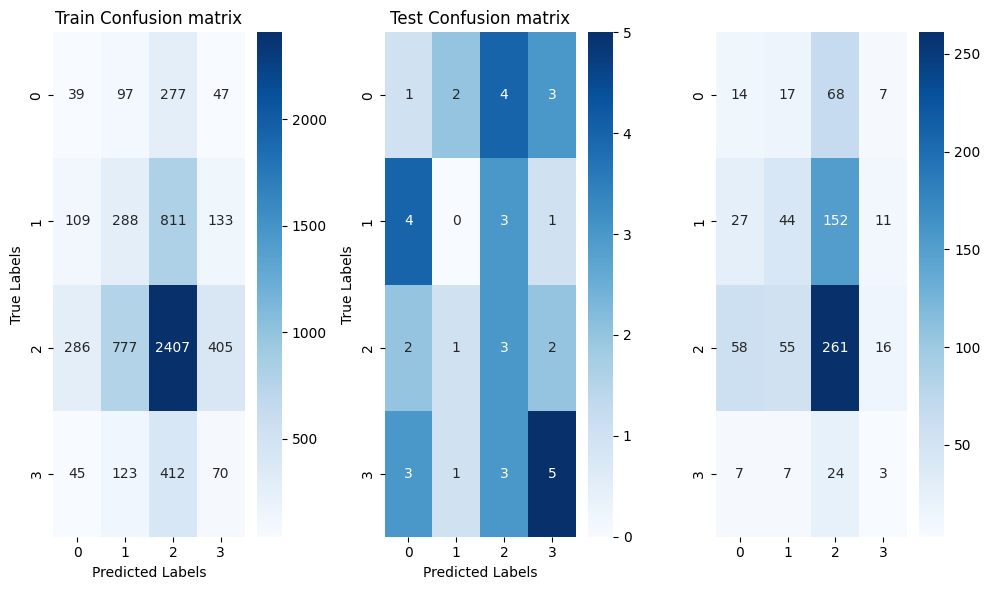

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# setup the figure
fig, axes = plt.subplots(1,3, figsize = (10,6))

# Train Confusion matrix
sns.heatmap(cm_train, annot = True, fmt='d', cmap = 'Blues', ax = axes[0])
axes[0].set_title('Train Confusion matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Validation Confusion Matrix
sns.heatmap(cm_val, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[1])
axes[1].set_title('Validation Confusion matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Test Confusion Matrix
sns.heatmap(cm_test, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[2])
axes[1].set_title('Test Confusion matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Adjust Layout
plt.tight_layout()
plt.show()

Fine tuning

In [ ]:
# load VGG16 with pre-trained ImageNet weights, excluding the top (fully connected) layers
base_model = VGG16(weights = 'imagenet',
                   include_top = False,
                   input_tensor = Input(shape=(224,224,3)))

# Freeze the first few layers
for layer in base_model.layers[:3]: # freeze first 15 layers, adjust as needed
    layer.trainable = False

# Unfreeze the remaining layers
for layer in base_model.layers[13:]:
    layer.trainable = True

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,675,968 (55.98 MB)

 Non-trainable params: 38,720 (151.25 KB)